# TRABALHO DE CIENCIA DE DADOS 
# ALUNO: ROBERTO EDER AGUIAR DE ABREU
# Projeto: Análise dados do Twitter
# Disciplina: Introdução a Ciência de Dados¶
# Professor: Erneson Oliveira

# Biblioteca importadas para facilitar a Análise dos dados do Twitter.

In [1]:
# Importando as bibliotecas que vamos utilizar durante o projeto:
import pandas as pd, numpy as np
import json
from matplotlib import cm
import nltk
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('portuguese') # Carregar Stopwords em português:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from nltk.tokenize import RegexpTokenizer
import re
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Iremos utilizar arquivos em json e vou converter as duas em CSV

In [3]:
# carregar dados 
df = pd.read_json (r"C:\POS\jairbolsonaro.json")
df.to_csv (r"C:\POS\jairbolsonaro.csv", index = None)

df_lula = pd.read_json (r"C:\POS\LulaOficial.json")
df_lula.to_csv (r"C:\POS\LulaOficial.csv", index = None)

## 1 - Decidir carregar o texto dos tweets e retirar tweets  repetidos para uma melhor anasile

In [4]:
# Número de linhas da coluna ‘full_text’: jairbolsonaro
df.full_text.count()


6794

In [5]:
# Número de linhas da coluna ‘full_text’: df_lula
df_lula.full_text.count()

14961

In [6]:
# Removendo os valores duplicados: jairbolsonaro
df.drop_duplicates(['full_text'], inplace=True)

In [7]:
# Removendo os valores duplicados: lulaoficial
df_lula.drop_duplicates(['full_text'], inplace=True)

In [8]:
# Número de linhas da coluna ‘full_text’: Jair
df.full_text.count()

6784

In [9]:
# Número de linhas da coluna ‘full_text’: Lula
df_lula.full_text.count()

14951

In [10]:
# criar variaveis de texto
texto = df['full_text']
texto_lula = df_lula['full_text']

In [11]:
#função para relizar limpeza dos dados
def Limpeza_dados(instancia):
    # remove links, pontos, virgulas,ponto e virgulas dos tweets
    instancia = re.sub(r"http\S+", "", instancia).lower().replace('.','').replace(';','').replace('-','').replace(':','').replace(')','')
    return (instancia)

In [12]:
# Aplica a função em todos os dados: jairbolsonaro
texto = [Limpeza_dados(i) for i in texto]

In [13]:
# Aplica a função em todos os dados: lulaoficial
texto_lulaoficial = [Limpeza_dados(i) for i in texto_lula]

In [14]:
#visualizar texto
##print(texto)
##print(texto_lulaoficial)

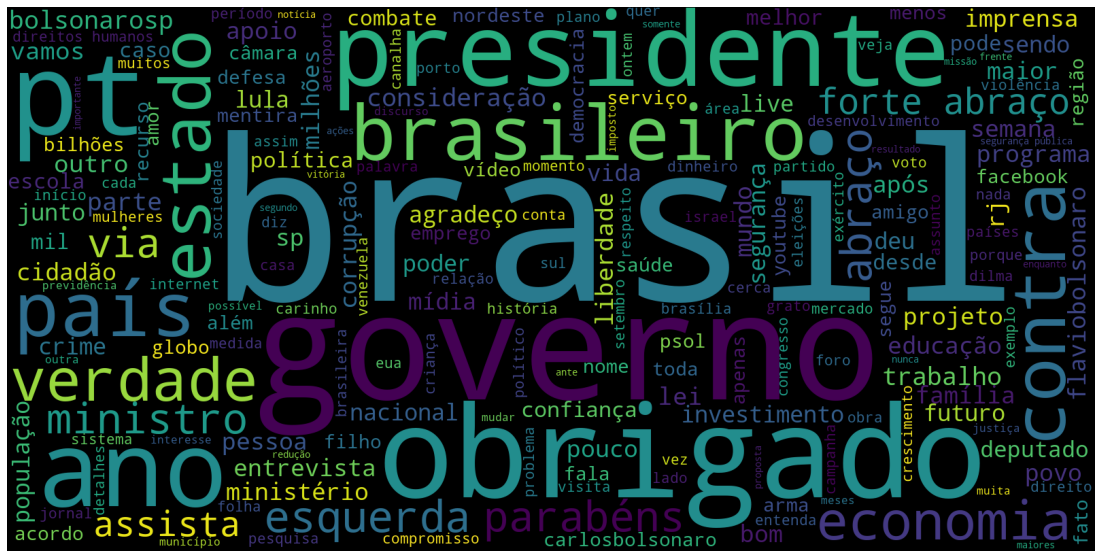

In [15]:
# concatenar as palavras
all_jair_bolsonaro = " ".join(s for s in texto)

# lista de stopword
stopwords_jair = set(nltk.corpus.stopwords.words('portuguese'))
# Criar stopwords com algumas palavras que nao fazem sentido
stopwords_jair.update(["da", "meu", "em", "você", "de", "ao", 'faz',"os", 'para', 'que','url','urls','https','false','null','https','h','w','twimg','x','pbs','y','http','true','t','co','twitter','jpg','resize','id','id_str','urls','indices','fit','udc','display_url','expanded_url','description','profile_images','lang','entities','created_at','png','bg','images','themes','theme','abs','br','vpdgjjz_normal','bqpnslal','faces','ueo','media','name','screen_name','pu','medium','large','iphone','video','small','wed','uddf','udde','photo','user','m','mar','geo','coordinates','c','following','hashtags','is_translator','protected','profile_text_color','geo_enabled','has_extended_profile','profile_background_image_url_https','profile_background_image_url',
'default_profile_image','profile_image_url','profile_image_url_https','profile_background_tile','can_media_tag','default_profile','profile_use_background_image','profile_sidebar_border_color','listed_count','favourites_count','is_translation_enabled','time_zone','friends_count','notifications','location','profile_link_color','verified','contributors_enabled','rel','statuses_count','followed_by','follow_request_sent','utc_offset','followers_count','profile_sidebar_fill_color','place','translator_type','profile_background_color','nofollow','in_reply_to_user_id_str','symbols','favorited','is_quote_status','in_reply_to_status_id_str','favorite_count',
'retweeted','truncated','retweet_count','in_reply_to_status_id','display_text_range','user_mentions','source','href','in_reply_to_screen_name','full_text','contributors','in_reply_to_user_id','profile_banner_url','profile_banners','www','none','ffffff','uedlia','b','ex','ufablica','status','bras','uercito','rep','ub','capit','ff','aef','download','ue','type','pic','media_url_https','sizes','crop','thumb','media_url','features','mp','possibly_sensitive','img','ext_tw_video_thumb','content_type','ext_tw_video','orig','tag','extended_entities','bitrate','vid','n','android','u','tinyurl','pl','aspect_ratio','variants',
'mu','video_info','monetizable','application','duration_millis','additional_media_info','mpegurl','thu','oct','tue','udd','mon','ufes','fri','sun','sat','s','be','youtu','sep','uea','aug','nov','goo','gl','apr','uerio','udcd','may','uc',
'mp','possibly_sensitive','p','jul','web','d','client','dec','quoted_status_id','quoted_status_id_str','quoted_status_permalink','expanded','display','quoted_status','sobre','ueancia','jun','udffb','jan','ser','uco','ud','feb',
'est','paulo','pa','und','janeiro','q','pol','minist','r','abra','uf','hoje','ly','grande','ueas','dia','uem','text','j','cdeed','vtuiialkiw','znhndgf_normal','ddeef','daf','ueds',
'hootsuite','country','place_type','json','api','polygon','full_name','country_code','attributes','contained_within','bounding_box',
'city','amplify_video_thumb','amplify_video','ufs','studio','tv','ow','videos','vai','ter','agora','fazer','vamo', 'quero', 'voltar',
'jair', 'jairbolsonaro', 'bolsonaro', 'rio','v','ues', 'alguns','ñ','qualquer','bem','hj','todo','ainda','boa','noite','todos','tudo','sempre'
,'novo', 'onde','fim','nova','tempo','dias'])

# gerar uma wordcloud de jair bolsonaro
wordcloud = WordCloud(stopwords=stopwords_jair,
                      background_color="black",
                      width=1600, height=800).generate(all_jair_bolsonaro)

# mostrar a imagem
fig, ax = plt.subplots(figsize=(20,10))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud);

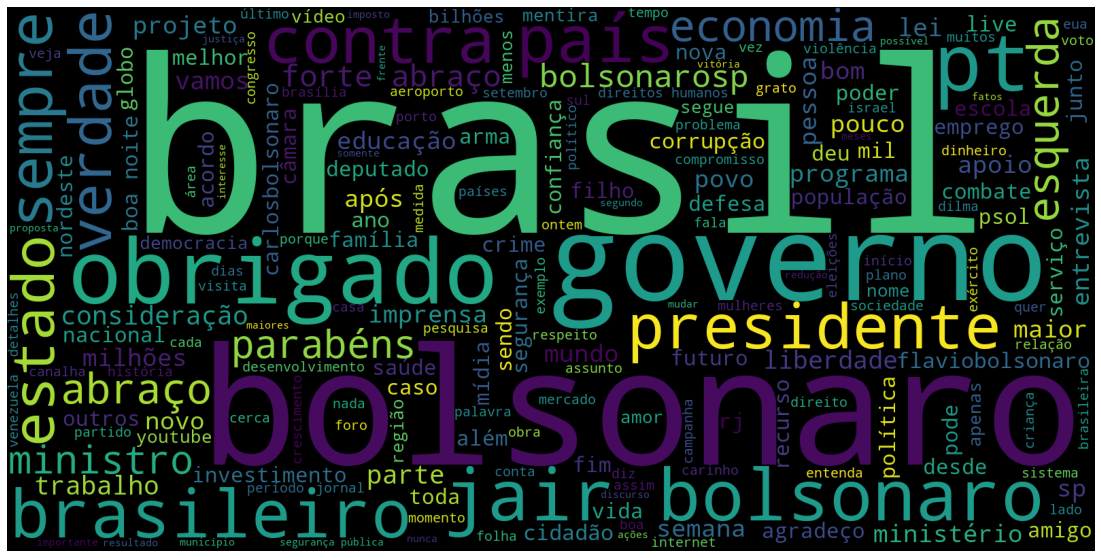

In [16]:
# concatenar as palavras
all_lula = " ".join(s for s in texto_lulaoficial)

# lista de stopword
stopwords_lula = set(nltk.corpus.stopwords.words('portuguese'))
# Criar stopwords com algumas palavras que nao fazem sentido
stopwords_lula.update(["da", "meu", "em", "você", "de", "ao", 'faz',"os", 'para', 'que','url','urls','https','false','null','https','h','w','twimg','x','pbs','y','http','true','t','co','twitter','jpg','resize','id','id_str','urls','indices','fit','udc','display_url','expanded_url','description','profile_images','lang','entities','created_at','png','bg','images','themes','theme','abs','br','vpdgjjz_normal','bqpnslal','faces','ueo','media','name','screen_name','pu','medium','large','iphone','video','small','wed','uddf','udde','photo','user','m','mar','geo','coordinates','c','following','hashtags','is_translator','protected','profile_text_color','geo_enabled','has_extended_profile','profile_background_image_url_https','profile_background_image_url',
'default_profile_image','profile_image_url','profile_image_url_https','profile_background_tile','can_media_tag','default_profile','profile_use_background_image','profile_sidebar_border_color','listed_count','favourites_count','is_translation_enabled','time_zone','friends_count','notifications','location','profile_link_color','verified','contributors_enabled','rel','statuses_count','followed_by','follow_request_sent','utc_offset','followers_count','profile_sidebar_fill_color','place','translator_type','profile_background_color','nofollow','in_reply_to_user_id_str','symbols','favorited','is_quote_status','in_reply_to_status_id_str','favorite_count',
'retweeted','truncated','retweet_count','in_reply_to_status_id','display_text_range','user_mentions','source','href','in_reply_to_screen_name','full_text','contributors','in_reply_to_user_id','profile_banner_url','profile_banners','www','none','ffffff','uedlia','b','ex','ufablica','status','bras','uercito','rep','ub','capit','ff','aef','download','ue','type','pic','media_url_https','sizes','crop','thumb','media_url','features','mp','possibly_sensitive','img','ext_tw_video_thumb','content_type','ext_tw_video','orig','tag','extended_entities','bitrate','vid','n','android','u','tinyurl','pl','aspect_ratio','variants',
'mu','video_info','monetizable','application','duration_millis','additional_media_info','mpegurl','thu','oct','tue','udd','mon','ufes','fri','sun','sat','s','be','youtu','sep','uea','aug','nov','goo','gl','apr','uerio','udcd','may','uc',
'mp','possibly_sensitive','p','jul','web','d','client','dec','quoted_status_id','quoted_status_id_str','quoted_status_permalink','expanded','display','quoted_status','sobre','ueancia','jun','udffb','jan','ser','uco','ud','feb',
'est','paulo','pa','und','janeiro','q','pol','minist','r','abra','uf','hoje','ly','grande','ueas','dia','uem','text','j','cdeed','vtuiialkiw','znhndgf_normal','ddeef','daf','ueds',
'hootsuite','country','place_type','json','api','polygon','full_name','country_code','attributes','contained_within','bounding_box',
'city','amplify_video_thumb','amplify_video','ufs','studio','tv','ow','videos','vai','ter','agora','fazer','vamo', 'quero', 'voltar', 'rio','v','ues', 'alguns','ñ','qualquer','bem','hj','todo','ainda','todos','tudo'
,'facebook','pra','voc','anos','lula', 'lulaoficial','lulapelobrasil','onde','via','outro','assista','fato'])

# gerar uma wordcloud frases de jair bolsonaro
wordcloud = WordCloud(stopwords=stopwords_lula,
                      background_color="black",
                      width=1600, height=800).generate(all_jair_bolsonaro)

# mostrar a imagem final
fig, ax = plt.subplots(figsize=(20,10))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud);

# Foi analisado que tanto Jair quanto Lula falam muito a palavra "Brasil", mas Lula cita  muito mais jairbolsonaro; Como o PT ganhou muitos desafetos esse fato do expresidente Lula(PT) cita Jair, pode ter Corroborado com o fato de o Atual Presidente ter ganho votos desses desafetos

#  2 - Analisar a quantidade total de tweets entre lula e jairbolsonaro

In [17]:
#carregar arquivos e utilizar a biblioteca PANDAS para converter em dataFrame
arquivo_bolsonaro = pd.read_json('C:\POS\jairbolsonaro.json')
dataf_jair = pd.DataFrame(data=arquivo_bolsonaro) 
arquivo_lula = pd.read_json('C:\POS\lulaoficial.json')
dataf_lula = pd.DataFrame(data=arquivo_lula) 
min(dataf_jair['created_at'])
min(dataf_lula['created_at'])
print(len(dataf_lula)) 
print(len(dataf_jair))

14961
6794


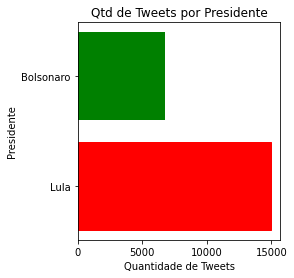

In [18]:
presidentes = ["Lula", "Bolsonaro"]
qtd_tweet = [len(dataf_lula), len(dataf_jair)]
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
barlist =plt.barh(presidentes, qtd_tweet, color="green")
barlist[0].set_color('r')
plt.title('Qtd de Tweets por Presidente')
plt.xlabel('Quantidade de Tweets')
plt.ylabel('Presidente')
plt.show()

# Foi verificado que o  Ex- presidente Lula tem mais tweets que o presidente Jair Bolsonaro 

#  3 - Vamos analisar o numero do favoritos de cada tweet

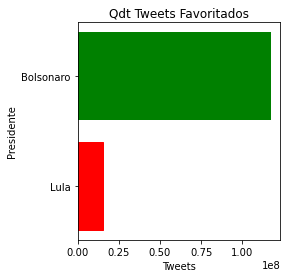

In [19]:
presidentes = ["Lula", "Bolsonaro"]
quantidade_favorito = [sum(dataf_lula['favorite_count']),sum(dataf_jair['favorite_count'])]
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
barlist = plt.barh(presidentes, quantidade_favorito, color="green")
barlist[0].set_color('red')
plt.title('Qdt Tweets Favoritados')
plt.xlabel('Tweets')
plt.ylabel('Presidente')
plt.show()



# Foi analisado que o presidente Jair Bolsonaro mesmo tendo publicado menos Tweet tem mais favoritados que o Ex-presidente

# 4 - Fazer uma analise das palavras mais citadas do presidente Bolsonaro

In [20]:
arq_jair = open('C:\POS\jairbolsonaro.json',"r")
ler_jair = (arq_jair.read())
limpando_jair = re.sub('[0-9]','', ler_jair)
tokenizer = RegexpTokenizer(r'\w+')
tokens_jair = tokenizer.tokenize(limpando_jair.lower())
tokens_jair_cleaned = [ w for w in tokens_jair if w not in stopwords_jair ]
top_10_jair = (pd.DataFrame(tokens_jair_cleaned)[0].value_counts()[:10])
print('10 Palavras mais citadas: JAIR')
print(top_10_jair)

10 Palavras mais citadas: JAIR
brasil             15220
presidente          7092
pt                  7061
brasileiro          6956
eleito              6831
federativa          6797
depbolsonaro         793
carlosbolsonaro      783
bolsonarosp          691
governo              418
Name: 0, dtype: int64


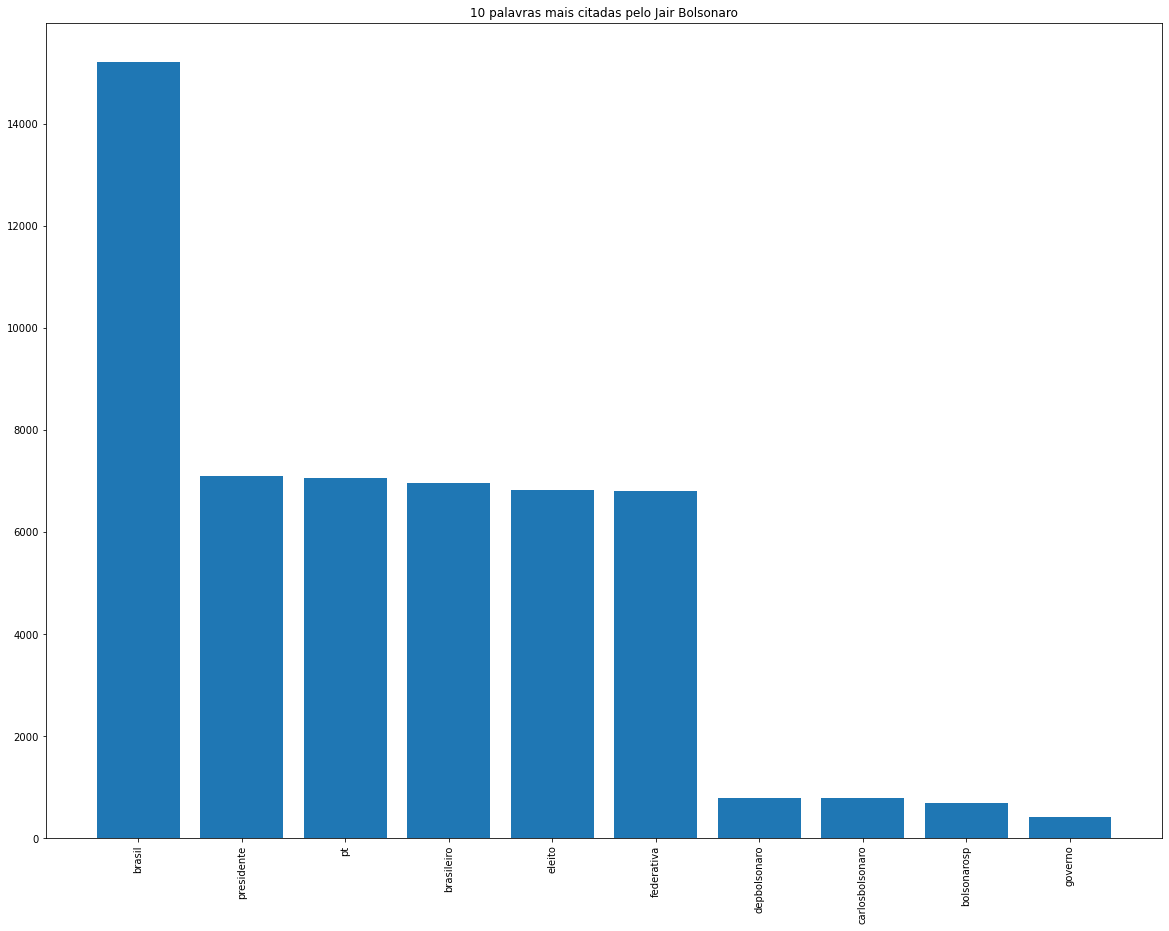

In [21]:
top_df_jair = pd.DataFrame(top_10_jair)
top_df_jair.to_csv('dataframejair.csv')
grafico__jair = pd.read_csv('dataframejair.csv', header=None,skiprows=[0])
x = grafico__jair[0]
y = grafico__jair[1]
fig,ax=plt.subplots(figsize=(20,15))
plt.xticks(rotation=90) 
ax.bar(x, y)
plt.title("10 palavras mais citadas pelo Jair Bolsonaro")

plt.show()

## Foi analisado que o Presidente Jair cita muito a palavra "Brasil" que foi uma dos slogan da sua candidatura("Brasil acima de tudo"), mas cita a Palavra "PT" que trata-se de um partido de diferença politica

# 5 - Fazer uma analise das palavras mais citadas do Ex-presidente Lula

In [22]:
# ler arquivo e utilizar o take
arq_lula = open('C:\POS\LulaOficial.json',"r")
ler_lula = (arq_lula.read())
limpando_lula = re.sub('[0-9]','', ler_lula)
tokenizer = RegexpTokenizer(r'\w+')
tokens_lula = tokenizer.tokenize(limpando_lula.lower())
tokens_lula_cleaned = [ w for w in tokens_lula if w not in stopwords_lula ]
top_10_lula = (pd.DataFrame(tokens_lula_cleaned)[0].value_counts()[:10])
print('10 Palavras mais citadas: LULA')
print(top_10_lula)

10 Palavras mais citadas: LULA
brasil                17933
presidente            16459
pt                    15621
brazil                 2135
haddad                 1682
haddad_fernando        1544
povo                   1436
fernando               1130
lulalivre               973
lulaporminasgerais      952
Name: 0, dtype: int64


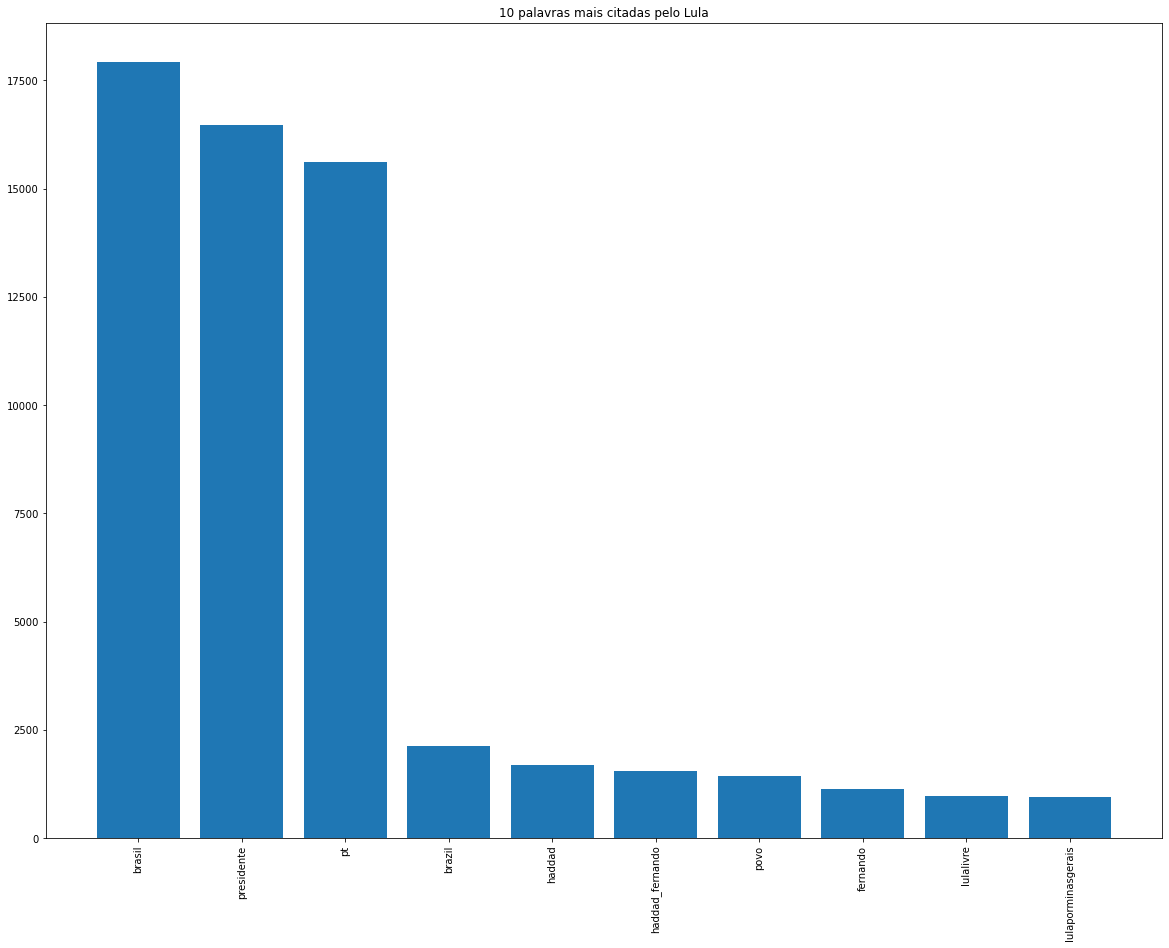

In [23]:
top_df_lula = pd.DataFrame(top_10_lula)
top_df_lula.to_csv('dataframeLula.csv')
grafico__lula = pd.read_csv('dataframelula.csv', header=None,skiprows=[0])
x = grafico__lula[0]
y = grafico__lula[1]
fig,ax=plt.subplots(figsize=(20,15))
plt.xticks(rotation=90) 
ax.bar(x, y)
plt.title("10 palavras mais citadas pelo Lula")

plt.show()

# O Ex-presidente Lula cita a palavra "Brasil" e "Brazil", e cita muito o Partido no qual é filiado(partido pelo qual foi eleito Presidente) e tem em 9 lugar a frase LulaLivre deve trata-se no momento em qual foi julgado na segunda instancia e Preso, e cita muito "Haddad" e "Haddad_Fernando" deve trata-se do periodo de eleição onde Haddad era candidato pelo Partido dos Trabalhadores"PT"

# 6 - Analise de Tweets onde existem citaçoes de ambos Presidentes 

In [24]:
 # criando funçoes para utilizar  utilizar nas citaçoes    


def citacoes(dataframe, pattern):
    return dataframe.set_index('full_text').filter(regex=pattern,axis=0).reset_index()
    
def citacoes_ano_mes(citacoes):
    ano_mes = citacoes['created_at'].map(lambda x: x.strftime('%d')) #saida para DIA
    citacoes.insert(0, 'ano_mes', ano_mes, True)
    citacoes.insert(1, 'total_citacoes', 1, True)
    citacoes_agrupadas = citacoes.groupby(['ano_mes']).sum().reset_index()
    return citacoes_agrupadas

def citacoes_total(citacoes) -> pd.DataFrame:
    return pd.DataFrame(data={'total_citacoes': list(citacoes['total_citacoes'])}, index=citacoes['ano_mes'])

def citacoes_mes_ano(citacoes):
    ano_mes = citacoes['created_at'].map(lambda x: x.strftime('%Y-%m')) #alterando saida para ANO-MÊS
    citacoes.insert(0, 'ano_mes', ano_mes, True)
    citacoes.insert(1, 'total_citacoes', 1, True)
    citacoes_agrupadas = citacoes.groupby(['ano_mes']).sum().reset_index()
    return citacoes_agrupadas


def citacoes_ano(citacoes):
    ano_mes = citacoes['created_at'].map(lambda x: x.strftime('%Y'))
    citacoes.insert(0, 'ano_mes', ano_mes, True)
    citacoes.insert(1, 'total_citacoes', 1, True)
    citacoes_agrupadas = citacoes.groupby(['ano_mes']).sum().reset_index()
    return citacoes_agrupadas

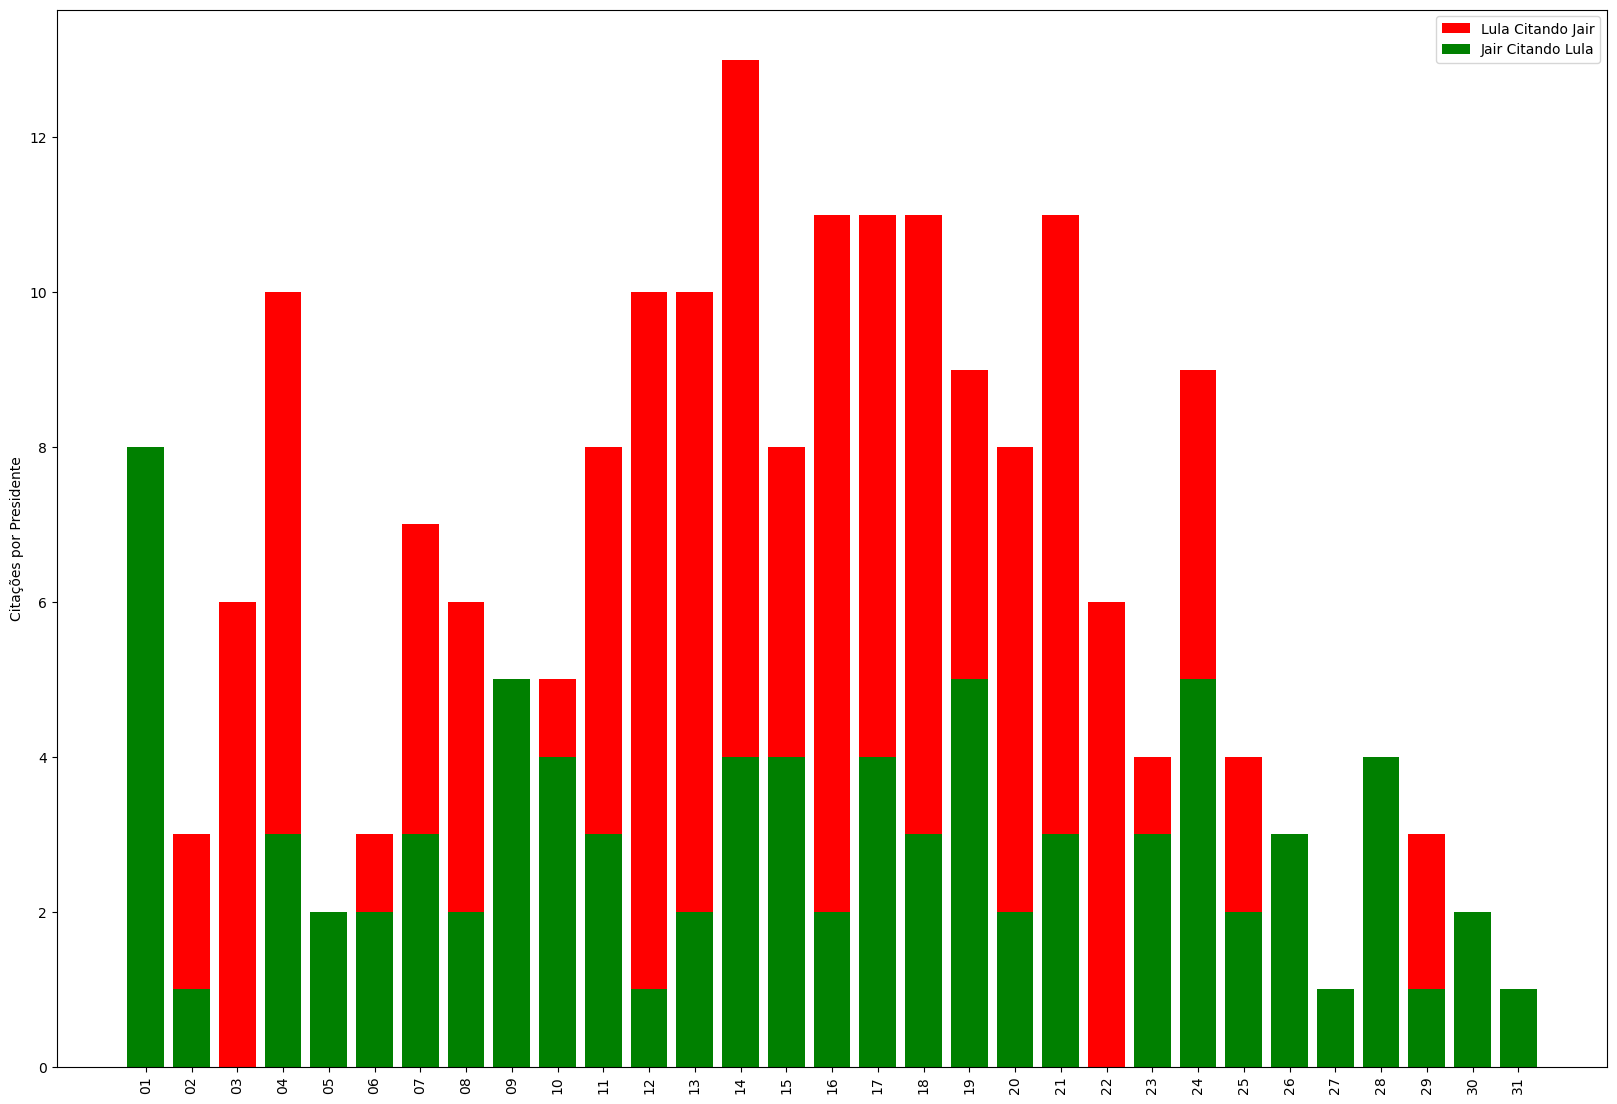

In [25]:
#Carregar Datasource com as entradas dos Dados
arquivobolsonaro = pd.read_json('C:\POS\jairbolsonaro.json')
df_jair = pd.DataFrame(data=arquivobolsonaro) 
arquivolula = pd.read_json('C:\POS\lulaoficial.json')
df_lula = pd.DataFrame(data=arquivolula) 


citacoes_bolso = citacoes(df_lula, 'Bolso')
citacoes_bolso_agrupadas = citacoes_ano_mes(citacoes_bolso)
citacoes_bolso_ano_mes = citacoes_total(citacoes_bolso_agrupadas)

citacoes_lula = citacoes(df_jair, 'Lula')
citacoes_lula_agrupadas = citacoes_ano_mes(citacoes_lula)
citacoes_lula_ano_mes_citacoes = citacoes_total(citacoes_lula_agrupadas)
figx=20
figy=(7/10)*figx
fig, ax = plt.subplots(figsize=(figx,figy),dpi=100)
citacoes_bolso_ano_mes
ax.bar(citacoes_bolso_ano_mes.index, citacoes_bolso_ano_mes['total_citacoes'],
       label='Lula Citando Jair', color='red')
ax.bar(citacoes_lula_ano_mes_citacoes.index, citacoes_lula_ano_mes_citacoes['total_citacoes'],
       label='Jair Citando Lula',color='green')
ax.set_xticklabels(pd.merge(citacoes_bolso_ano_mes, citacoes_lula_ano_mes_citacoes, 
                            on='ano_mes', how='outer',sort=True).index, rotation=90)
ax.set_ylabel("Citações por Presidente")
ax.legend()
plt.show()

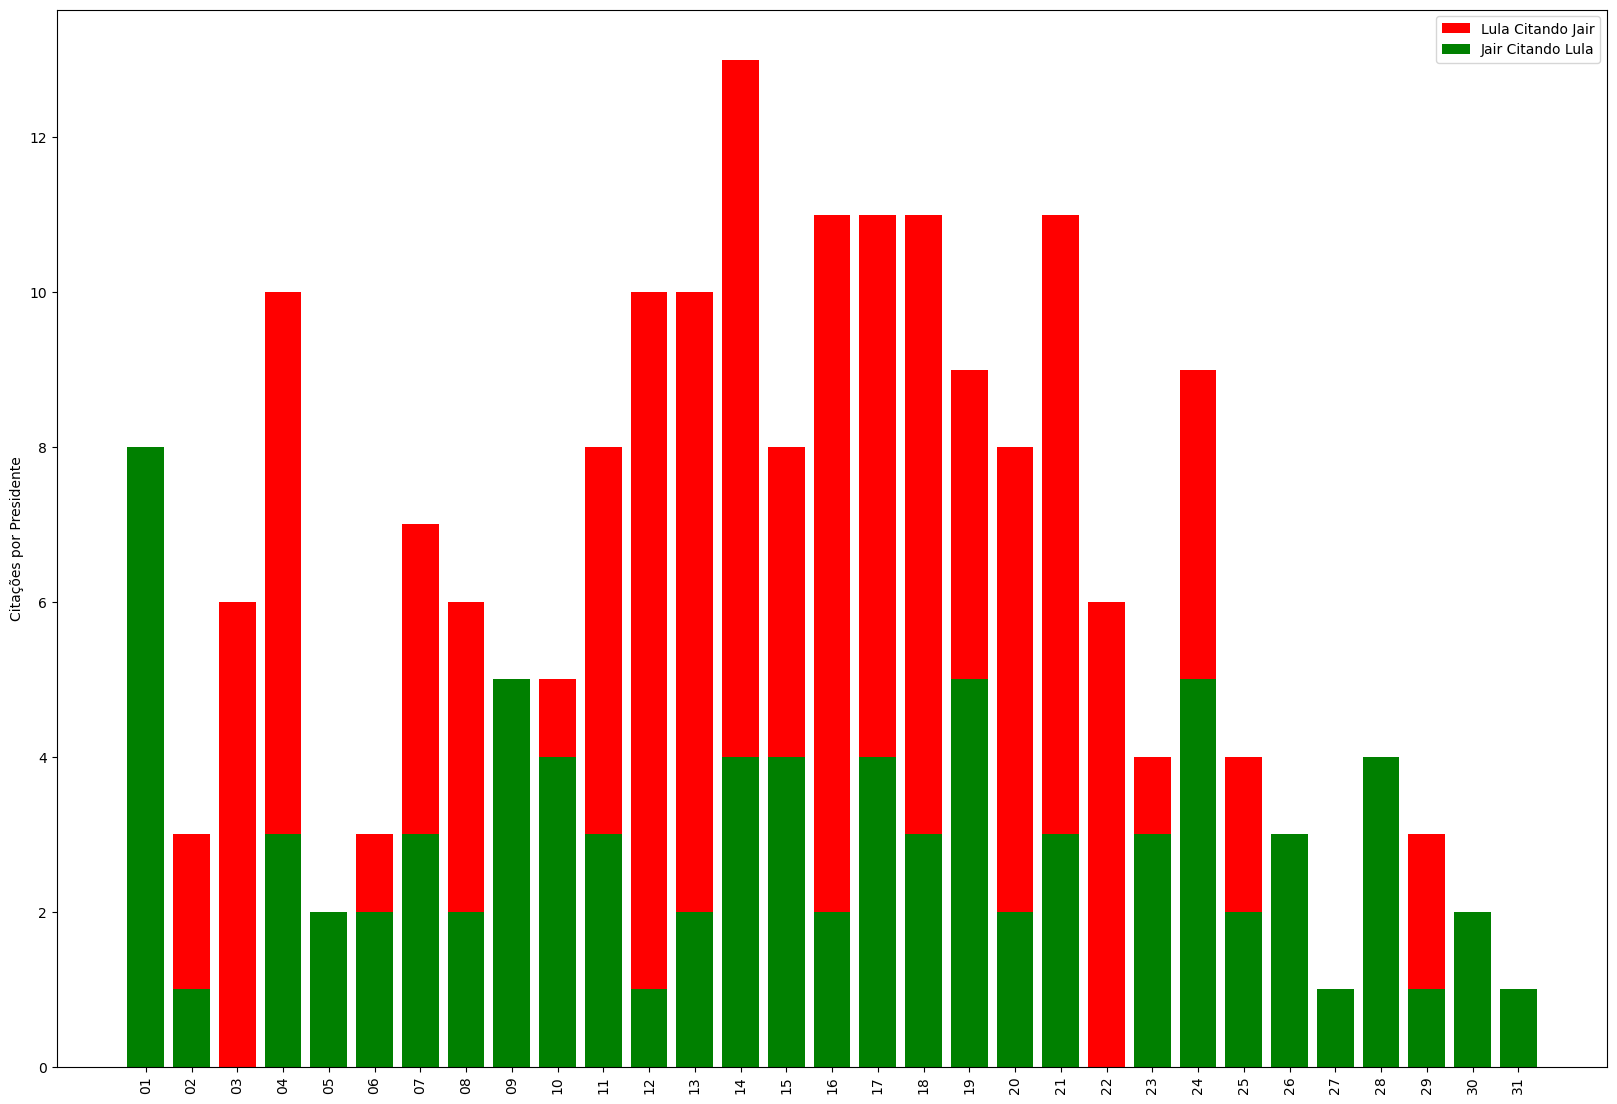

In [26]:

citacoes_bolso = citacoes(df_lula, 'Bolso')
citacoes_bolso_agrupadas = citacoes_ano_mes(citacoes_bolso)
citacoes_bolso_ano_mes = citacoes_total(citacoes_bolso_agrupadas)

citacoes_lula = citacoes(df_jair, 'Lula')
citacoes_lula_agrupadas = citacoes_ano_mes(citacoes_lula)
citacoes_lula_ano_mes_citacoes = citacoes_total(citacoes_lula_agrupadas)
figx=20
figy=(7/10)*figx
fig, ax = plt.subplots(figsize=(figx,figy),dpi=100)
citacoes_bolso_ano_mes
ax.bar(citacoes_bolso_ano_mes.index, citacoes_bolso_ano_mes['total_citacoes'],
       label='Lula Citando Jair', color='red')
ax.bar(citacoes_lula_ano_mes_citacoes.index, citacoes_lula_ano_mes_citacoes['total_citacoes'],
       label='Jair Citando Lula',color='green')
ax.set_xticklabels(pd.merge(citacoes_bolso_ano_mes, citacoes_lula_ano_mes_citacoes, 
                            on='ano_mes', how='outer',sort=True).index, rotation=90)
ax.set_ylabel("Citações por Presidente")
ax.legend()
plt.show()

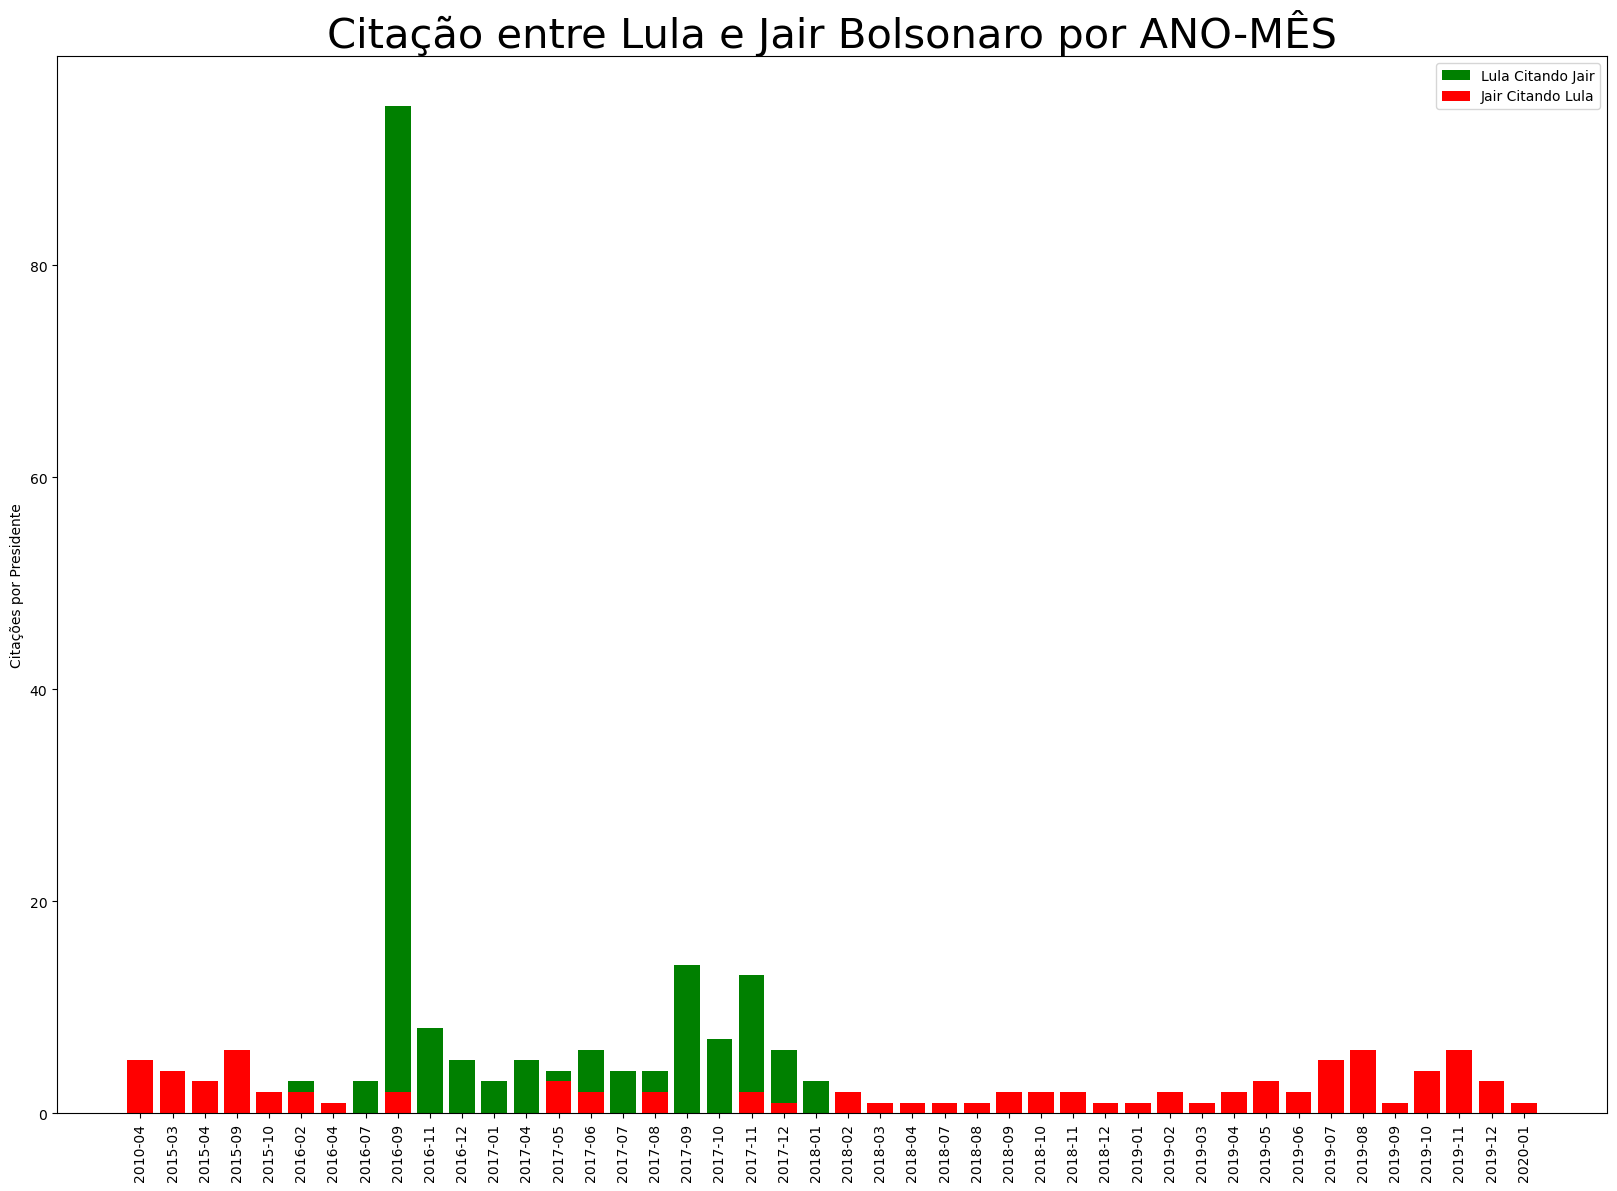

In [27]:

citacoes_bolso = citacoes(df_lula, 'Bolso')
citacoes_bolso_agrupadas = citacoes_mes_ano(citacoes_bolso)
citacoes_bolso_ano_mes_citacoes = citacoes_total(citacoes_bolso_agrupadas)

citacoes_lula = citacoes(df_jair, 'Lula')
citacoes_lula_agrupadas = citacoes_mes_ano(citacoes_lula)
citacoes_lula_ano_mes_citacoes = citacoes_total(citacoes_lula_agrupadas)

figx=20
figy=(7/10)*figx
fig, ax = plt.subplots(figsize=(figx,figy),dpi=100)
ax.bar(citacoes_bolso_ano_mes_citacoes.index, citacoes_bolso_ano_mes_citacoes['total_citacoes'], 
       label='Lula Citando Jair',color='green')
ax.bar(citacoes_lula_ano_mes_citacoes.index, citacoes_lula_ano_mes_citacoes['total_citacoes'], 
       label='Jair Citando Lula', color='red')
ax.set_xticklabels(pd.merge(citacoes_bolso_ano_mes_citacoes, citacoes_lula_ano_mes_citacoes, 
                            on='ano_mes', how='outer', sort=True).index, rotation=90)
ax.set_ylabel("Citações por Presidente")
ax.set_title('Citação entre Lula e Jair Bolsonaro por ANO-MÊS',size=30)
ax.legend()
plt.show()

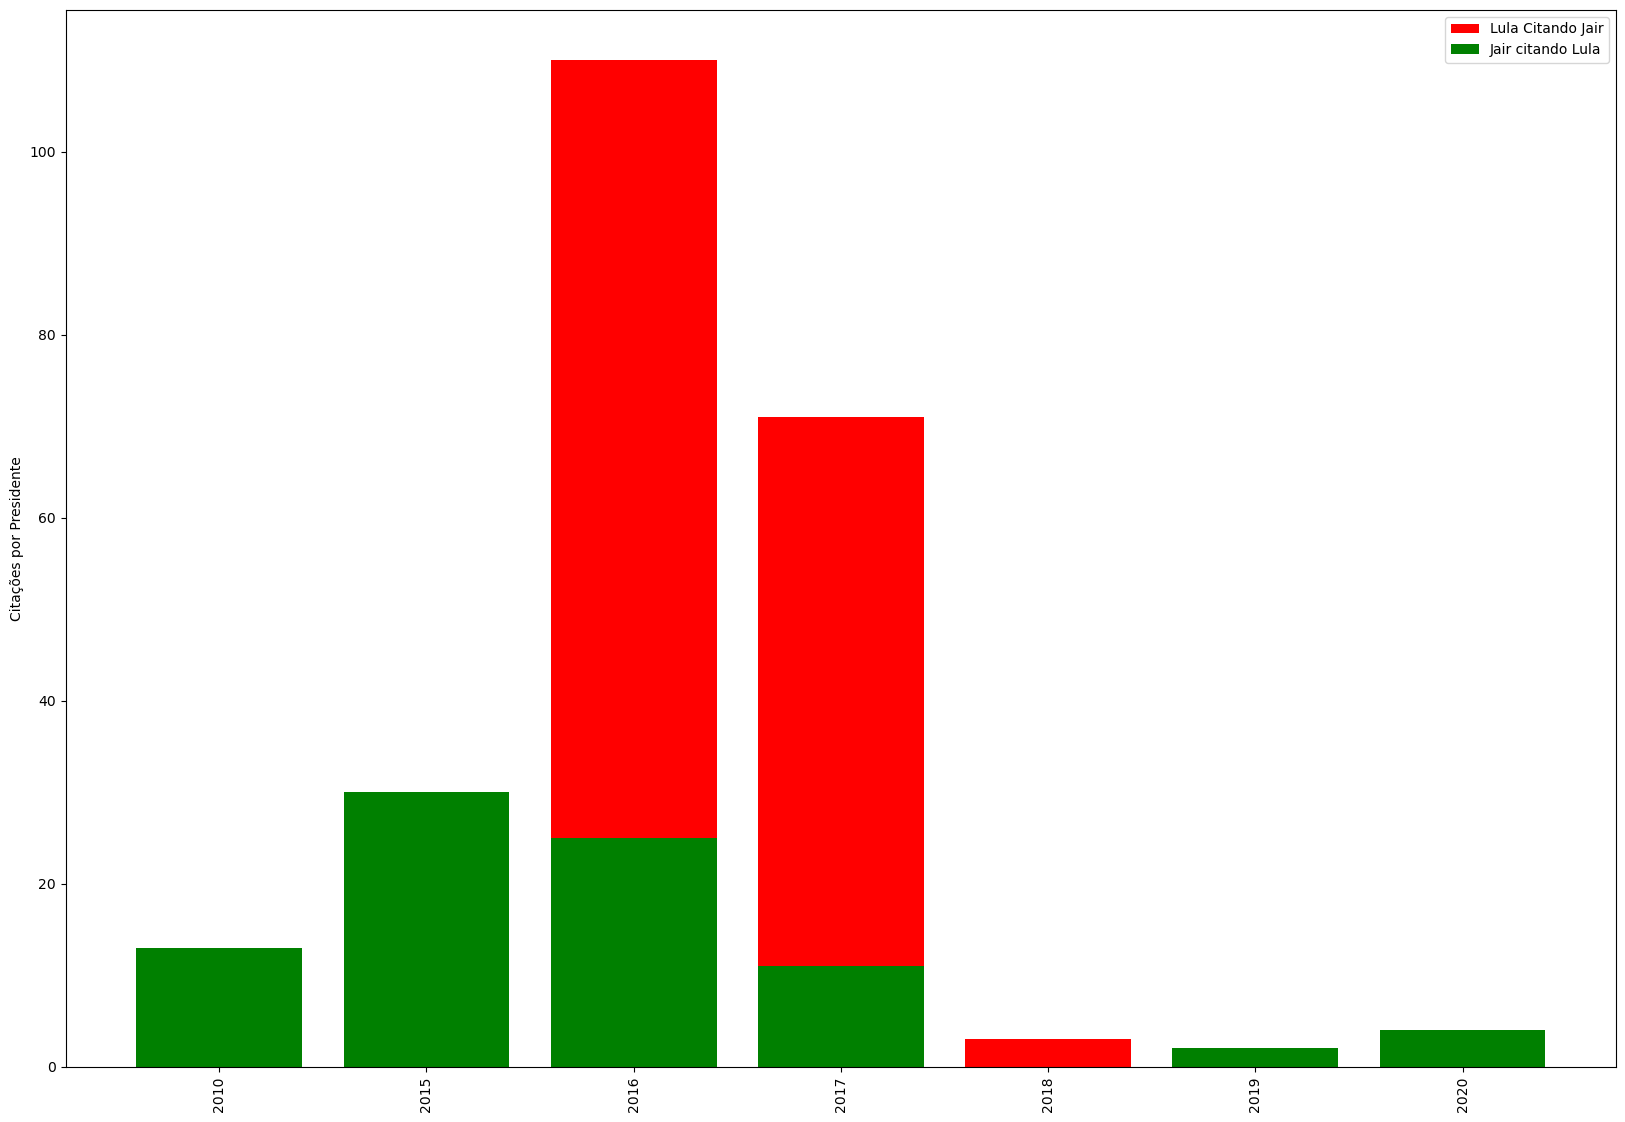

In [28]:

citacoes_bolso = citacoes(df_lula, 'Bolso')
citacoes_bolso_agrupadas = citacoes_ano(citacoes_bolso)
citacoes_bolso_ano_mes_citacoes = citacoes_total(citacoes_bolso_agrupadas)

citacoes_lula = citacoes(df_jair, 'Lula')
citacoes_lula_agrupadas = citacoes_ano(citacoes_lula)
citacoes_lula_ano_mes_citacoes = citacoes_total(citacoes_lula_agrupadas)

figx=20
figy=(7/10)*figx
fig, ax = plt.subplots(figsize=(figx,figy),dpi=100)
citacoes_bolso_ano_mes_citacoes
ax.bar(citacoes_bolso_ano_mes_citacoes.index, citacoes_bolso_ano_mes_citacoes['total_citacoes'],
       label='Lula Citando Jair', color='red')
ax.bar(citacoes_lula_ano_mes_citacoes.index, citacoes_lula_ano_mes_citacoes['total_citacoes'],
       label='Jair citando Lula',color='green')
ax.set_xticklabels(pd.merge(citacoes_bolso_ano_mes_citacoes, citacoes_lula_ano_mes_citacoes, 
                            on='ano_mes', how='outer',sort=True).index, rotation=90)
ax.set_ylabel("Citações por Presidente")
ax.legend()
plt.show()

# Bolsonaro começa a cita Lula em 2010
# Lula começa a cita Jair em 2016

# 7 - Analise das citações dos Presidentes a Ex-presidente Dilma

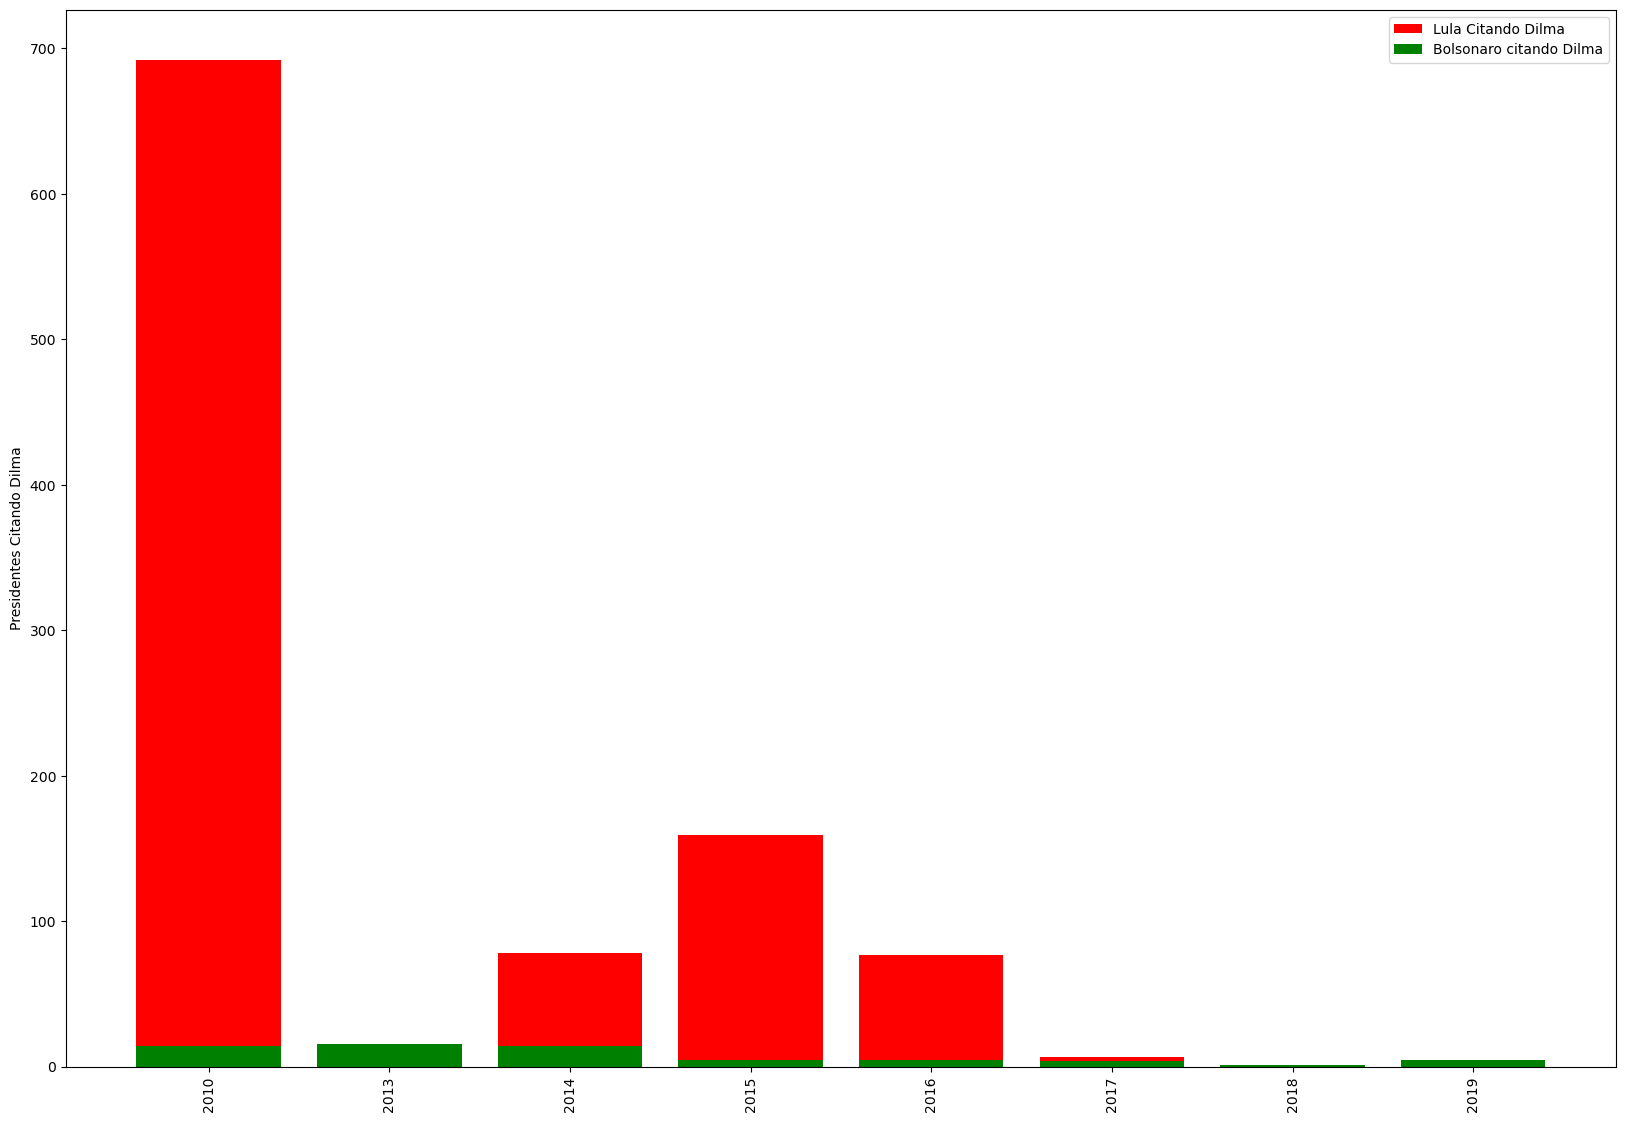

In [29]:

citacoes_bolso = citacoes(df_lula, 'Dilma')
citacoes_bolso_agrupadas = citacoes_ano(citacoes_bolso)
citacoes_bolso_ano_mes_citacoes = citacoes_total(citacoes_bolso_agrupadas)

citacoes_lula = citacoes(df_jair, 'Dilma')
citacoes_lula_agrupadas = citacoes_ano(citacoes_lula)
citacoes_lula_ano_mes_citacoes = citacoes_total(citacoes_lula_agrupadas)

figx=20
figy=(7/10)*figx
fig, ax = plt.subplots(figsize=(figx,figy),dpi=100)
citacoes_bolso_ano_mes_citacoes
ax.bar(citacoes_bolso_ano_mes_citacoes.index, citacoes_bolso_ano_mes_citacoes['total_citacoes'],
       label='Lula Citando Dilma', color='red')
ax.bar(citacoes_lula_ano_mes_citacoes.index, citacoes_lula_ano_mes_citacoes['total_citacoes'],
       label='Bolsonaro citando Dilma',color='green')
ax.set_xticklabels(pd.merge(citacoes_bolso_ano_mes_citacoes, citacoes_lula_ano_mes_citacoes, 
                            on='ano_mes', how='outer',sort=True).index, rotation=90)
ax.set_ylabel("Presidentes Citando Dilma")
ax.legend()
plt.show()

# Lula cita mais a Ex-Presidente Dilma que o atual presidente

# 8 - Analise das citações dos Presidentes ao Ex-presidente Temer

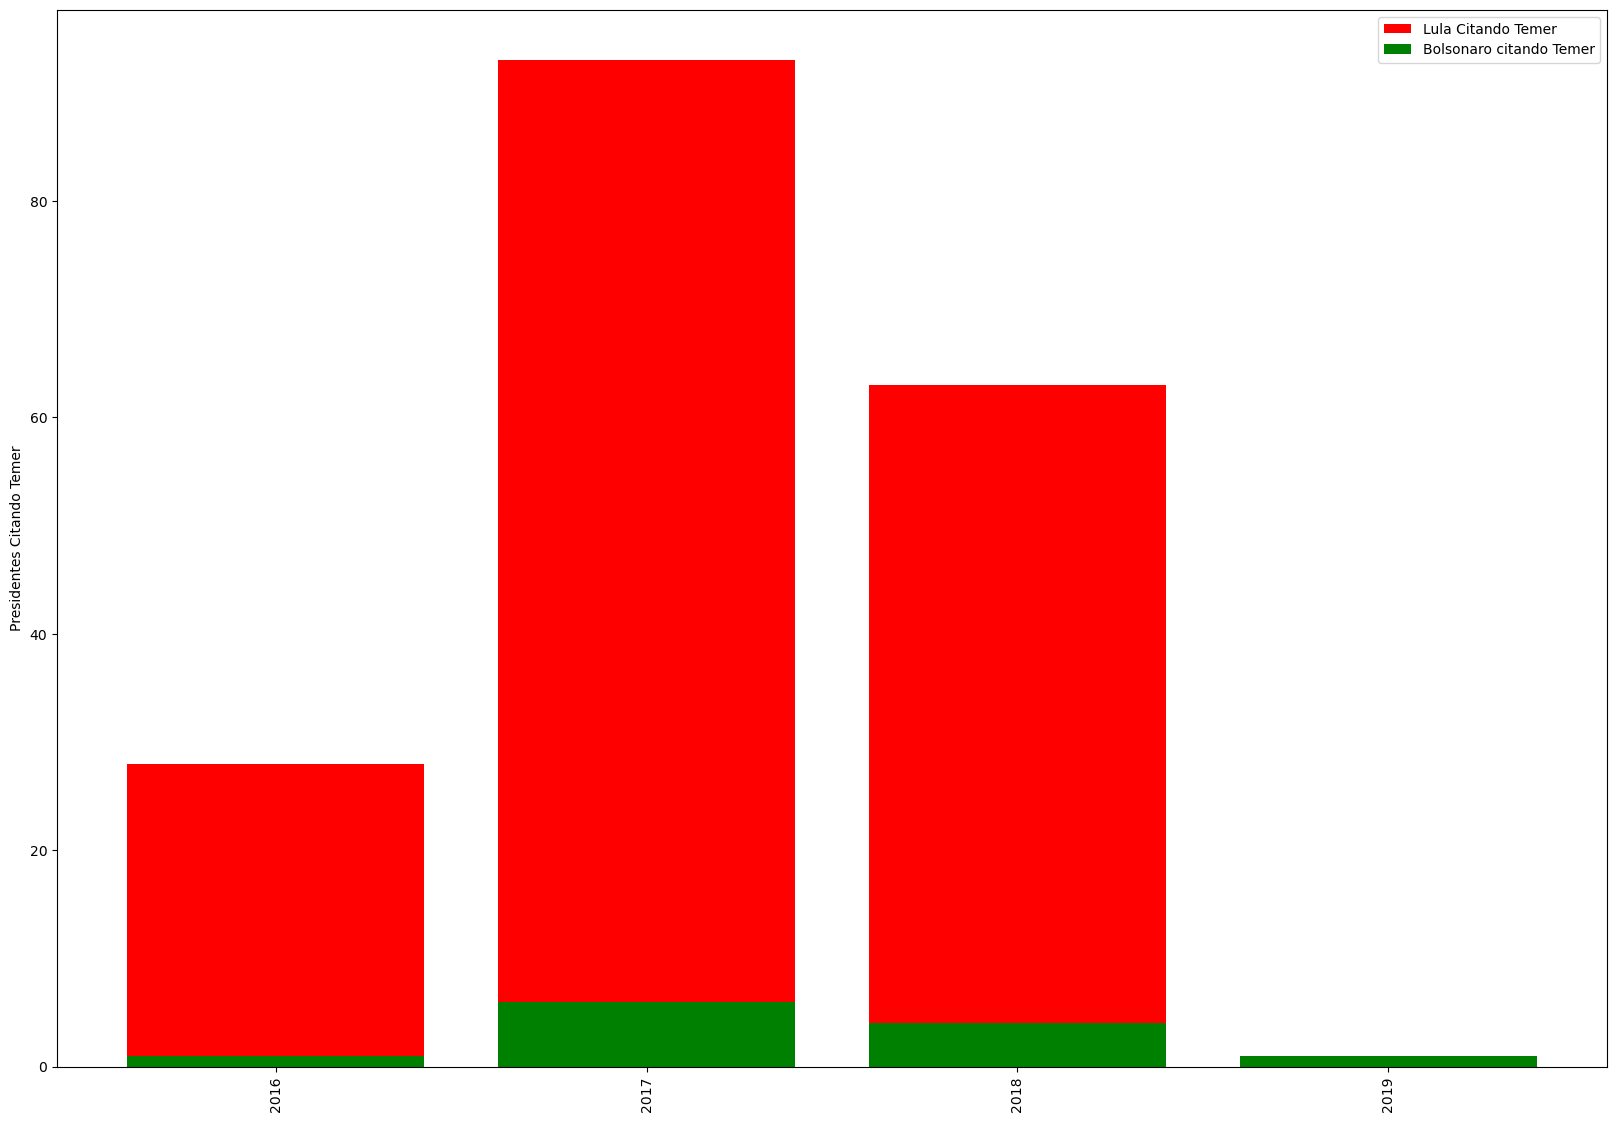

In [30]:

citacoes_bolso = citacoes(df_lula, 'Temer')
citacoes_bolso_agrupadas = citacoes_ano(citacoes_bolso)
citacoes_bolso_ano_mes_citacoes = citacoes_total(citacoes_bolso_agrupadas)

citacoes_lula = citacoes(df_jair, 'Temer')
citacoes_lula_agrupadas = citacoes_ano(citacoes_lula)
citacoes_lula_ano_mes_citacoes = citacoes_total(citacoes_lula_agrupadas)

figx=20
figy=(7/10)*figx
fig, ax = plt.subplots(figsize=(figx,figy),dpi=100)
citacoes_bolso_ano_mes_citacoes
ax.bar(citacoes_bolso_ano_mes_citacoes.index, citacoes_bolso_ano_mes_citacoes['total_citacoes'],
       label='Lula Citando Temer', color='red')
ax.bar(citacoes_lula_ano_mes_citacoes.index, citacoes_lula_ano_mes_citacoes['total_citacoes'],
       label='Bolsonaro citando Temer',color='green')
ax.set_xticklabels(pd.merge(citacoes_bolso_ano_mes_citacoes, citacoes_lula_ano_mes_citacoes, 
                            on='ano_mes', how='outer',sort=True).index, rotation=90)
ax.set_ylabel("Presidentes Citando Temer")
ax.legend()
plt.show()

# Lula cita mais ao Ex-Presidente Temer que o atual presidente

# Considerações Finais

A analise dos dados repassados Verificamos que o Presidente Jair Bolsonaro tem mais favoritadas e retweets que o de Lula, é como se o publico do Jair fosse mais engajado.

Ambos Presidentes citam a Palavra "Brasil" e "Presidente" deve ser por causa do cargo de Presidente como uma forma de expressa o povo Brasileiro.

O presidente Lula cita muito mais os Ex-presidentes Dilma e Temer, deve ser por causa que Dilma foi Eleita Presitente pelo Partido o qual o ex-presidente Lula é filiado e Temer era Vice e realizou articulação para o Impeachment da ex-presidente Dilma.